In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Titanic_train.csv')

In [3]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data=data.drop(['Cabin','Name','PassengerId','Ticket'], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


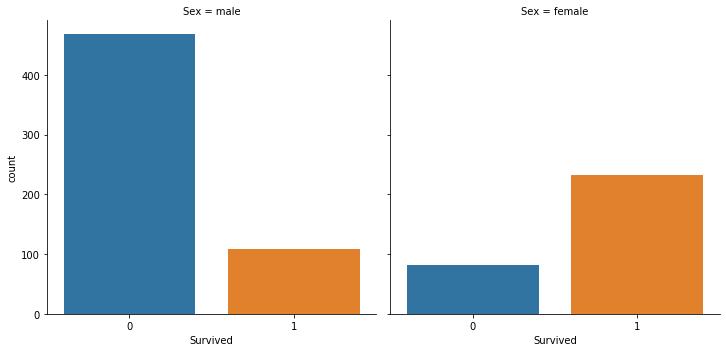

In [11]:
sns.catplot(x="Survived", col='Sex', kind='count', data=data)

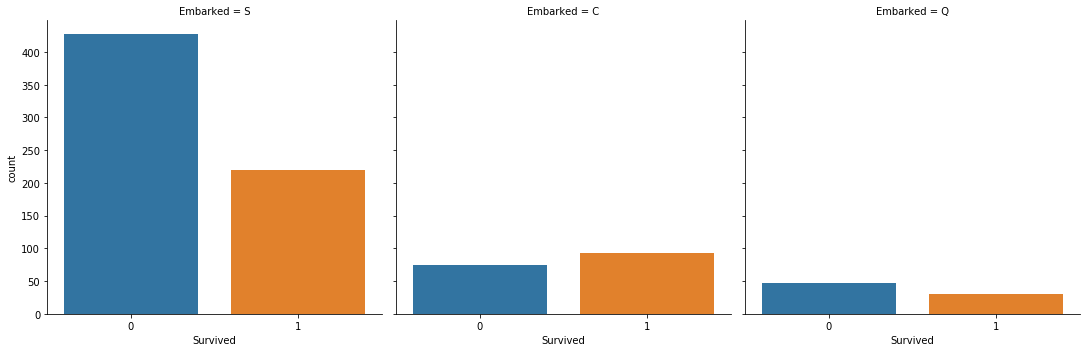

In [12]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=data)

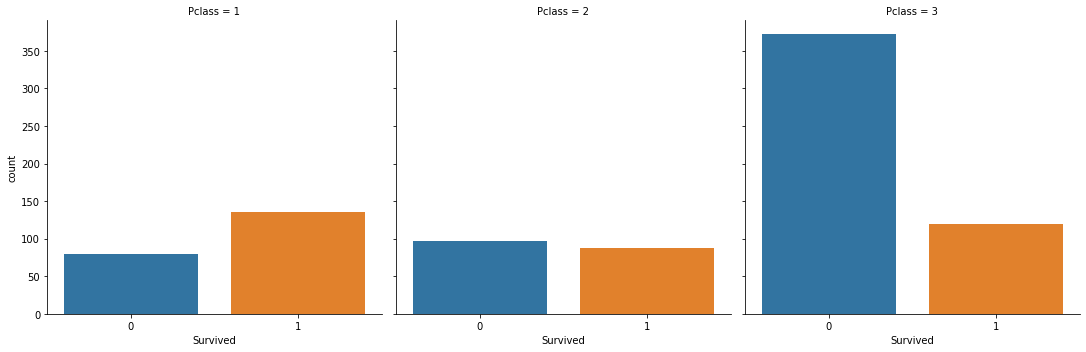

In [13]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=data)

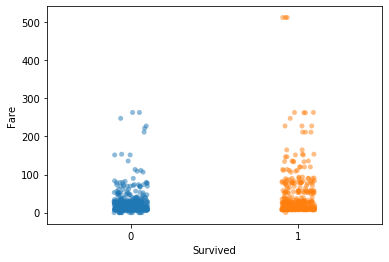

In [14]:
sns.stripplot(x='Survived', y='Fare', data=data, alpha=0.5, jitter=True)

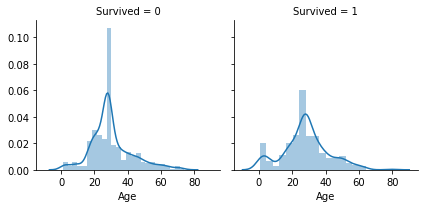

In [15]:
g = sns.FacetGrid(data, col='Survived')
g = g.map(sns.distplot, "Age")

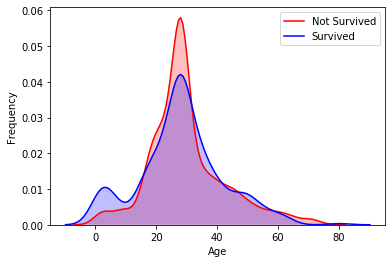

In [16]:
g = sns.kdeplot(data["Age"][(data["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(data["Age"][(data["Survived"] == 1)], color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

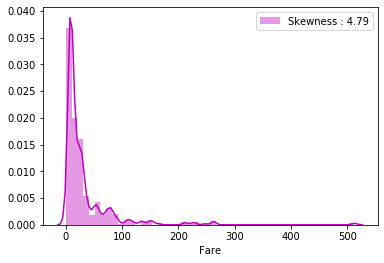

In [17]:
g = sns.distplot(data["Fare"], color="m", label="Skewness : %.2f"%(data["Fare"].skew()))
g = g.legend(loc="best")

In [18]:
scale = preprocessing.StandardScaler().fit(data[['Age', 'Fare']])
data[['Age', 'Fare']] = scale.transform(data[['Age', 'Fare']])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.565736,1,0,-0.502445,S
1,1,1,female,0.663861,1,0,0.786845,C
2,1,3,female,-0.258337,0,0,-0.488854,S
3,1,1,female,0.433312,1,0,0.420730,S
4,0,3,male,0.433312,0,0,-0.486337,S
...,...,...,...,...,...,...,...,...
886,0,2,male,-0.181487,0,0,-0.386671,S
887,1,1,female,-0.796286,0,0,-0.044381,S
888,0,3,female,-0.104637,1,2,-0.176263,S
889,1,1,male,-0.258337,0,0,-0.044381,C


In [19]:
le=LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2
...,...,...,...,...,...,...,...,...
886,0,2,1,-0.181487,0,0,-0.386671,2
887,1,1,0,-0.796286,0,0,-0.044381,2
888,0,3,0,-0.104637,1,2,-0.176263,2
889,1,1,1,-0.258337,0,0,-0.044381,0


In [20]:
y=data.Survived
x=data.drop(['Survived'], axis=1)

In [21]:
from sklearn.metrics import f1_score
def maxf1score(cm,x,y):
    maxf1=0
    rs=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.30, stratify=y)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        fsc=f1_score(y_test,y_pred)
        if fsc>maxf1:
            maxf1=fsc
            rs=r_state
    print("Maximum f1_score is at random state :",rs," and it is :",maxf1)

In [28]:
# Using KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier()
maxf1score(knn,x,y)

Maximum f1_score is at random state : 132  and it is : 0.801980198019802


In [30]:
knn=KNeighborsClassifier()
k_range = list(range(1,50))
hyperparametersknn=dict(n_neighbors=k_range)
gridknn=GridSearchCV(knn, hyperparametersknn, cv=5, scoring='f1')
gridknn.fit(x,y)
print(gridknn.best_params_)

{'n_neighbors': 23}


In [31]:
print("Mean f1 score for KNN after cross validation: ", cross_val_score(knn,x,y,cv=5,scoring="f1").mean())
print("Standard deviation for KNN from mean f1 score is : ", cross_val_score(knn,x,y,cv=5,scoring="f1").std())

Mean f1 score for Logistic Regression after cross validation:  0.7166181368659582
Standard deviation for Logistic Regression from mean f1 score is :  0.03058024931475818


In [ ]:
# Using Logistic Regression

In [32]:
Logreg=LogisticRegression()
maxf1score(Logreg,x,y)

Maximum f1_score is at random state : 41  and it is : 0.801980198019802


In [33]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [34]:
Logreg=LogisticRegression()
C = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1', 'l2']
hyperparametersLogreg=dict(C=C, penalty=penalty)
gridlr=GridSearchCV(Logreg, hyperparametersLogreg, cv=5, scoring='f1')
gridlr.fit(x,y)
print(gridlr.best_params_)

{'C': 1, 'penalty': 'l1'}


In [35]:
print("Mean f1 score for Logistic Regression after cross validation: ", cross_val_score(Logreg,x,y,cv=5,scoring="f1").mean())
print("Standard deviation for Logistic Regression from mean f1 score is : ", cross_val_score(Logreg,x,y,cv=5,scoring="f1").std())

Mean f1 score for Logistic Regression after cross validation:  0.7116237303757907
Standard deviation for Logistic Regression from mean f1 score is :  0.024839901181159786


In [39]:
# Using Random Forest Classifier

In [38]:
rfc=RandomForestClassifier()
maxf1score(rfc,x,y)

Maximum f1_score is at random state : 12  and it is : 0.8038277511961723


In [37]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [43]:
rfc=RandomForestClassifier()
hyperparametersrfc={'criterion':['gini','entropy'],'max_depth':range(1,10)}
gridrfc=GridSearchCV(rfc, hyperparametersrfc, cv=5, scoring='f1')
gridrfc.fit(x,y)
print(gridrfc.best_params_)

{'criterion': 'entropy', 'max_depth': 9}


In [44]:
print("Mean f1 score for Random Forest Classifier after cross validation: ", cross_val_score(rfc,x,y,cv=5,scoring="f1").mean())
print("Standard deviation for Random Forest Classifier from mean f1 score is : ", cross_val_score(rfc,x,y,cv=5,scoring="f1").std())

Mean f1 score for Random Forest Classifier after cross validation:  0.722951812564238
Standard deviation for Random Forest Classifier from mean f1 score is :  0.06971377817316225


In [ ]:
# The above analysis indicates that Random Forest Classifier has the highest f1 score

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=12,test_size=.30,stratify=y)
rfc.fit(x_train,y_train)
predicty=rfc.predict(x_test)
print(confusion_matrix(y_test,predicty))
print(classification_report(y_test,predicty))

[[139  26]
 [ 19  84]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       165
           1       0.76      0.82      0.79       103

    accuracy                           0.83       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268



In [46]:
from sklearn.externals import joblib
joblib.dump(knn,'titanic_datset_rfc.pkl')

['titanic_datset_rfc.pkl']